In [ ]:
!pip install torch-scatter==latest+cpu torch-sparse==latest+cpu torch-cluster==latest+cpu torch-spline-conv==latest+cpu -f https://pytorch-geometric.com/whl/torch-1.9.0+cpu.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 6.3 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

### Define a Graph

In [ ]:
"Define a Graph"

# a graph with 4 nodes

edge_list = torch.tensor([

              [0,0,0,1,2,2,3,3], #source nodes
              [1,2,3,0,0,3,0,2]
], dtype=torch.long)


In [ ]:
# 6 features for each node (4x6 - number of nodes x number of features)
node_features = torch.tensor([
    [-8,1,5,8,2,-3], #features of node 0
    [-1,0,2,-3,0,1], #features of node 1
    [1,-1,0,-1,2,1], #features of node 2
    [0,1,4,-2,3,4], #features of node 3
    ],dtype=torch.long)

In [ ]:
# 1 weight for each edge
edge_weight = torch.tensor([
    [35.], # weight for nodes (0,1)
    [48.], # weight for nodes (0,2)
    [12.], # weight for nodes (0,3)
    [10.], # weight for nodes (1,0)
    [70.], # weight for nodes (2,0)
    [5.], # weight for nodes (2,3)
    [15.], # weight for nodes (3,0)
    [8.], # weight for nodes (3,2)
    ],dtype=torch.long)

In [ ]:
#make a data object to store graph information

data = Data(x=node_features, edge_index=edge_list, edge_attr=edge_weight)
data

Data(x=[4, 6], edge_index=[2, 8], edge_attr=[8, 1])

In [ ]:
# Print the graph info

print("Number of Nodes: ", data.num_nodes)
print("Number of Edges: ", data.num_edges)
print("Number of Features per Node: ", data.num_node_features)
print("Number of weight per Edge (Edge Features): ",data.num_edge_features)

Number of Nodes:  4
Number of Edges:  8
Number of Features per Node:  6
Number of weight per Edge (Edge Features):  1


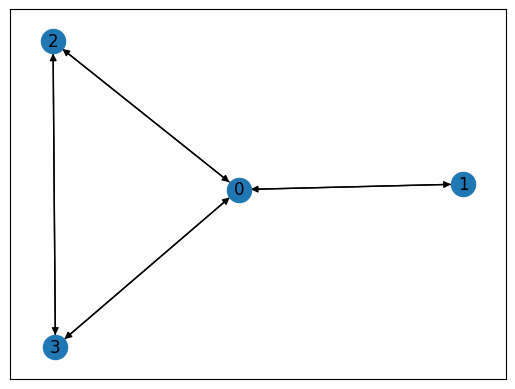

In [ ]:
# Plot the Graph
G = to_networkx(data)
nx.draw_networkx(G)

**Second Workshop**

In [ ]:
import networkx as nx
G = nx.karate_club_graph()
print("Number of Nodes in karate club graph: ", len(G.nodes))

Number of Nodes in karate club graph:  34


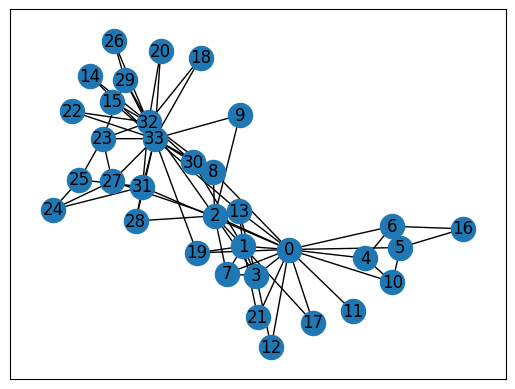

In [ ]:
nx.draw_networkx(G)

### Plot the graph with labels

In [ ]:
labels=[]
for i in G.nodes:
  node_labels = G.nodes[i]['club']
  labels.append(1 if node_labels=="Officer" else 0)

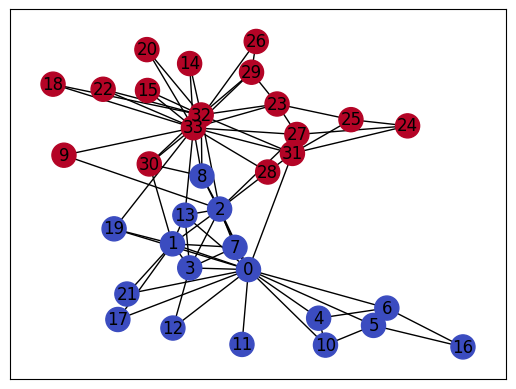

In [ ]:
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = layout_pos, node_color = labels, cmap = 'coolwarm')

### Perform node embeddings using DeepWalk

In [ ]:
pip install karateclub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 74.4 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101982 sha256=50356ab4f908666c9f6702b2b8069e1acf734b5a290125dd5cecca70398cbac4
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.

In [ ]:
import networkx as nx
from karateclub import DeepWalk

In [ ]:
# construct the deepwalk model
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
# fit the data with our model
Deepwalk_model.fit(G)
#the embeddings of our model -> embedding representation of data
embedding = Deepwalk_model.get_embedding()
print("Embedding Array shape: (nodes x features)", embedding.shape)
# here the embeddings have 124 features for each of our nodes hence the 34 x 124

Embedding Array shape: (nodes x features) (34, 124)


The embedding representation can be used for different tasks.
like clustering, node classification, edge estimation, edge classification, and etc.

### Low dimensional plot of the nodes x features

In [ ]:
import sklearn

PCA_model = sklearn.decomposition.PCA(n_components=2)
# 2-dimensional embedding -> 34 x 2
low_dimension_embedding = PCA_model.fit_transform(embedding)
print("low dimensional embedding representation (nodes x 2): ", low_dimension_embedding.shape)

low dimensional embedding representation (nodes x 2):  (34, 2)


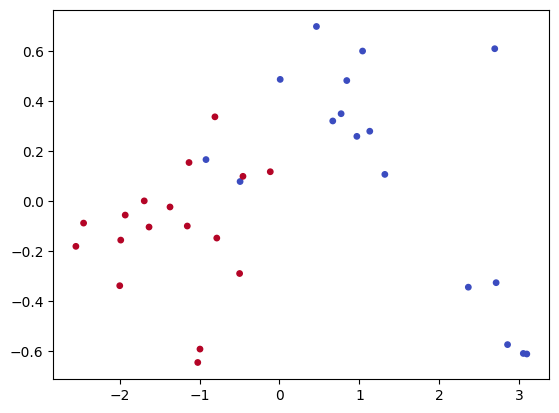

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(low_dimension_embedding[:,0], low_dimension_embedding[:,1],c=labels, s=15, cmap="coolwarm")

The sepeartion is because of the structure of the network and how the deepwalk algorithm works. so for each node the algorithm is going to see how it can be connected to other nodes and it goes through that path and the similarity between two nodes is the probability of seeing the first node if we start at second other node and then do a random walk with a given number of walks and the length of the walk that we have considered.

So the reson that these nodes are seperated is that some nodes were closer to each other therefore more seenable and the others were further away.


### Node classification using embedded model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

x_train, x_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print('DeepWalk AUC: ', ML_acc)

DeepWalk AUC:  0.9


## Node2Vec Workshop

In [ ]:
from karateclub import Node2Vec

In [ ]:
# p is more than q so we prefer staying in the local neighborhood
n2vec_model = Node2Vec(walk_number=10, walk_length=80, p=0.9, q=0.1, dimensions=124)
n2vec_model.fit(G)
n2vec_embedding = n2vec_model.get_embedding()
print("Embedding dimension of Node2Vec: ", n2vec_embedding.shape)

Embedding dimension of Node2Vec:  (34, 124)


low dimensional PCA

dimension of PCA n2vec model:  (34, 2)


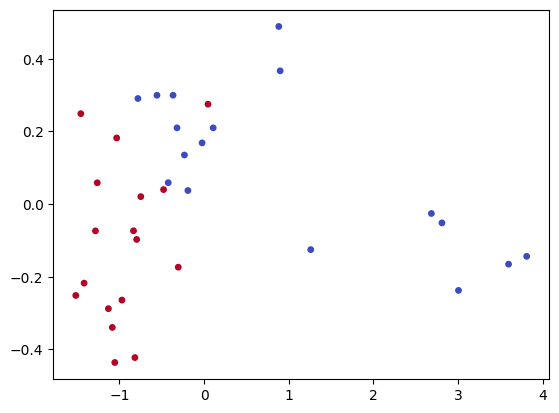

In [ ]:
lowdim_n2vec_embedding = PCA_model.fit_transform(n2vec_embedding)
print("dimension of PCA n2vec model: ", lowdim_n2vec_embedding.shape)
plt.scatter(lowdim_n2vec_embedding[:,0], lowdim_n2vec_embedding[:,1],
            c=labels, s=15, cmap='coolwarm')

In [ ]:
nx_train, nx_test, ny_train, ny_test = train_test_split(n2vec_embedding, labels, test_size=0.3)
nML_model = LogisticRegression(random_state=0).fit(nx_train, ny_train)
ny_predict = nML_model.predict(nx_test)
nML_acc = roc_auc_score(ny_test, ny_predict)
print("Node2Vec AUC: ", nML_acc)


Node2Vec AUC:  1.0
